![image.png](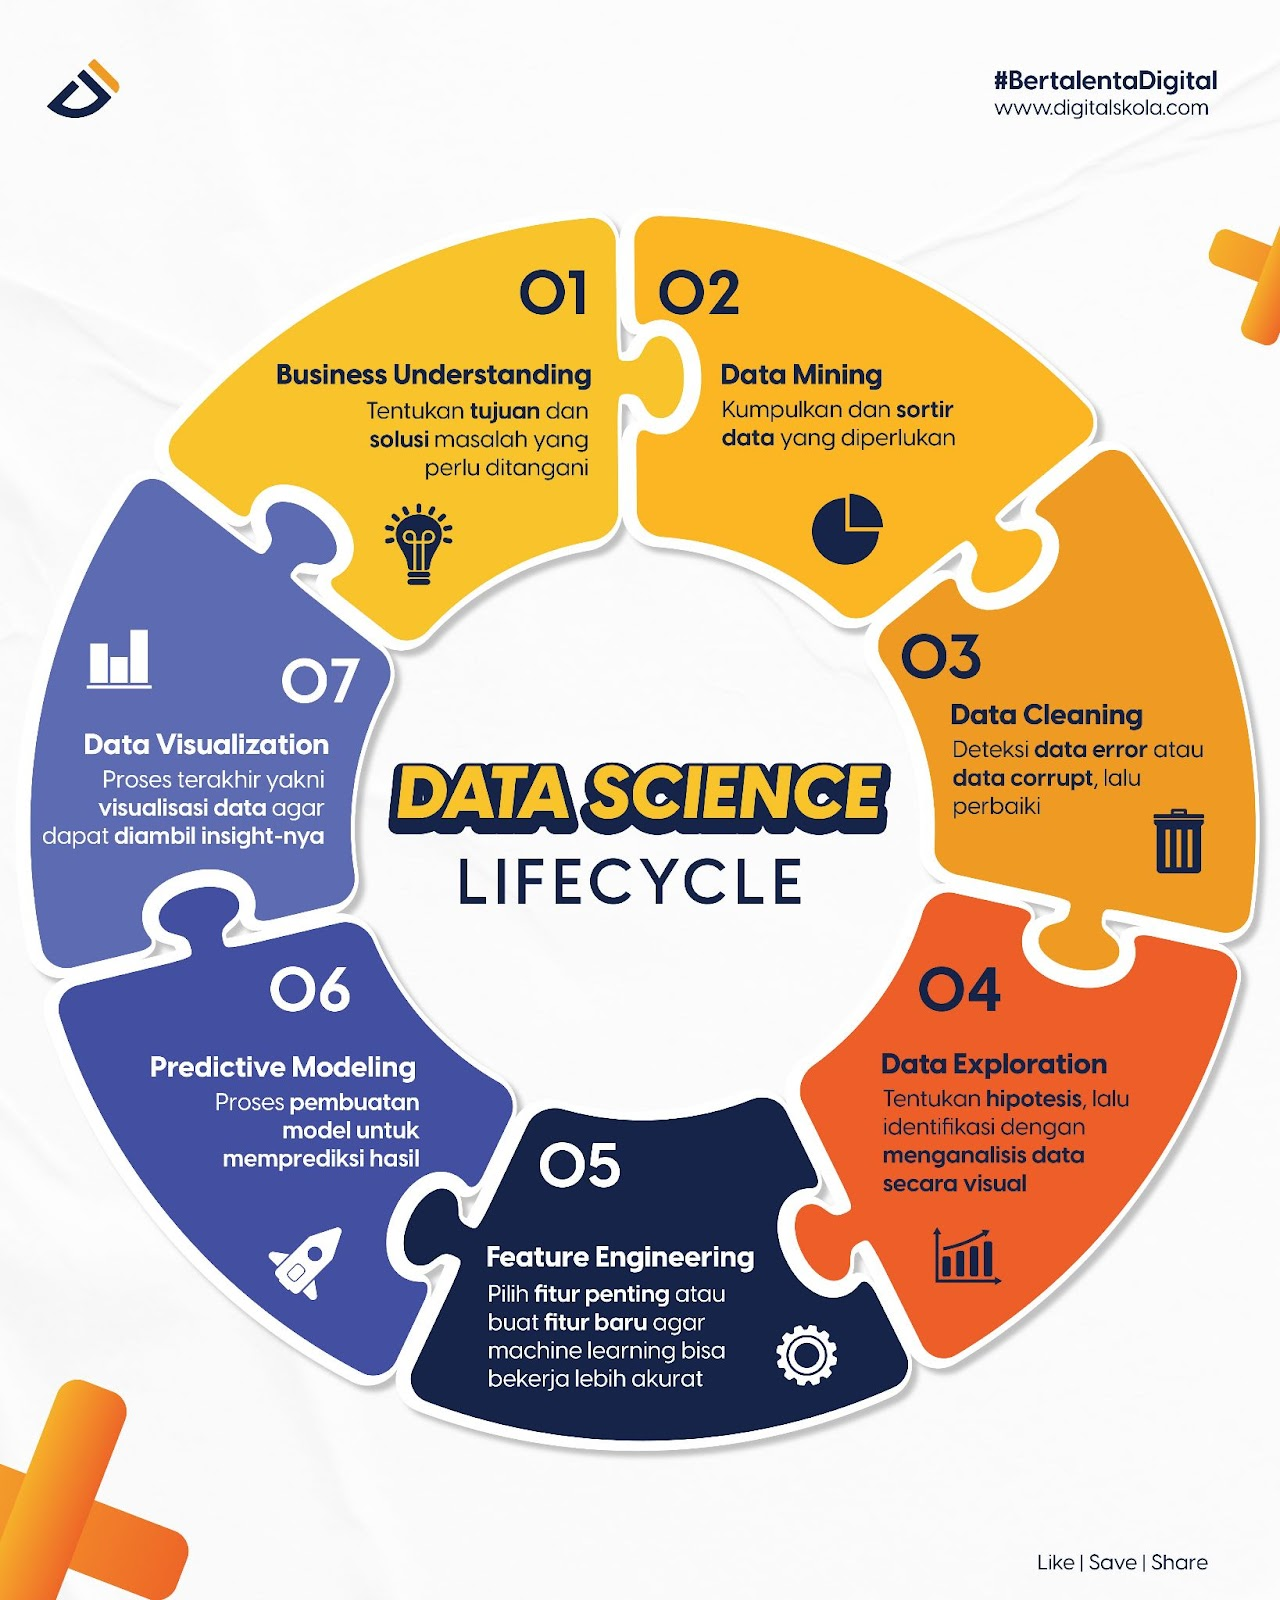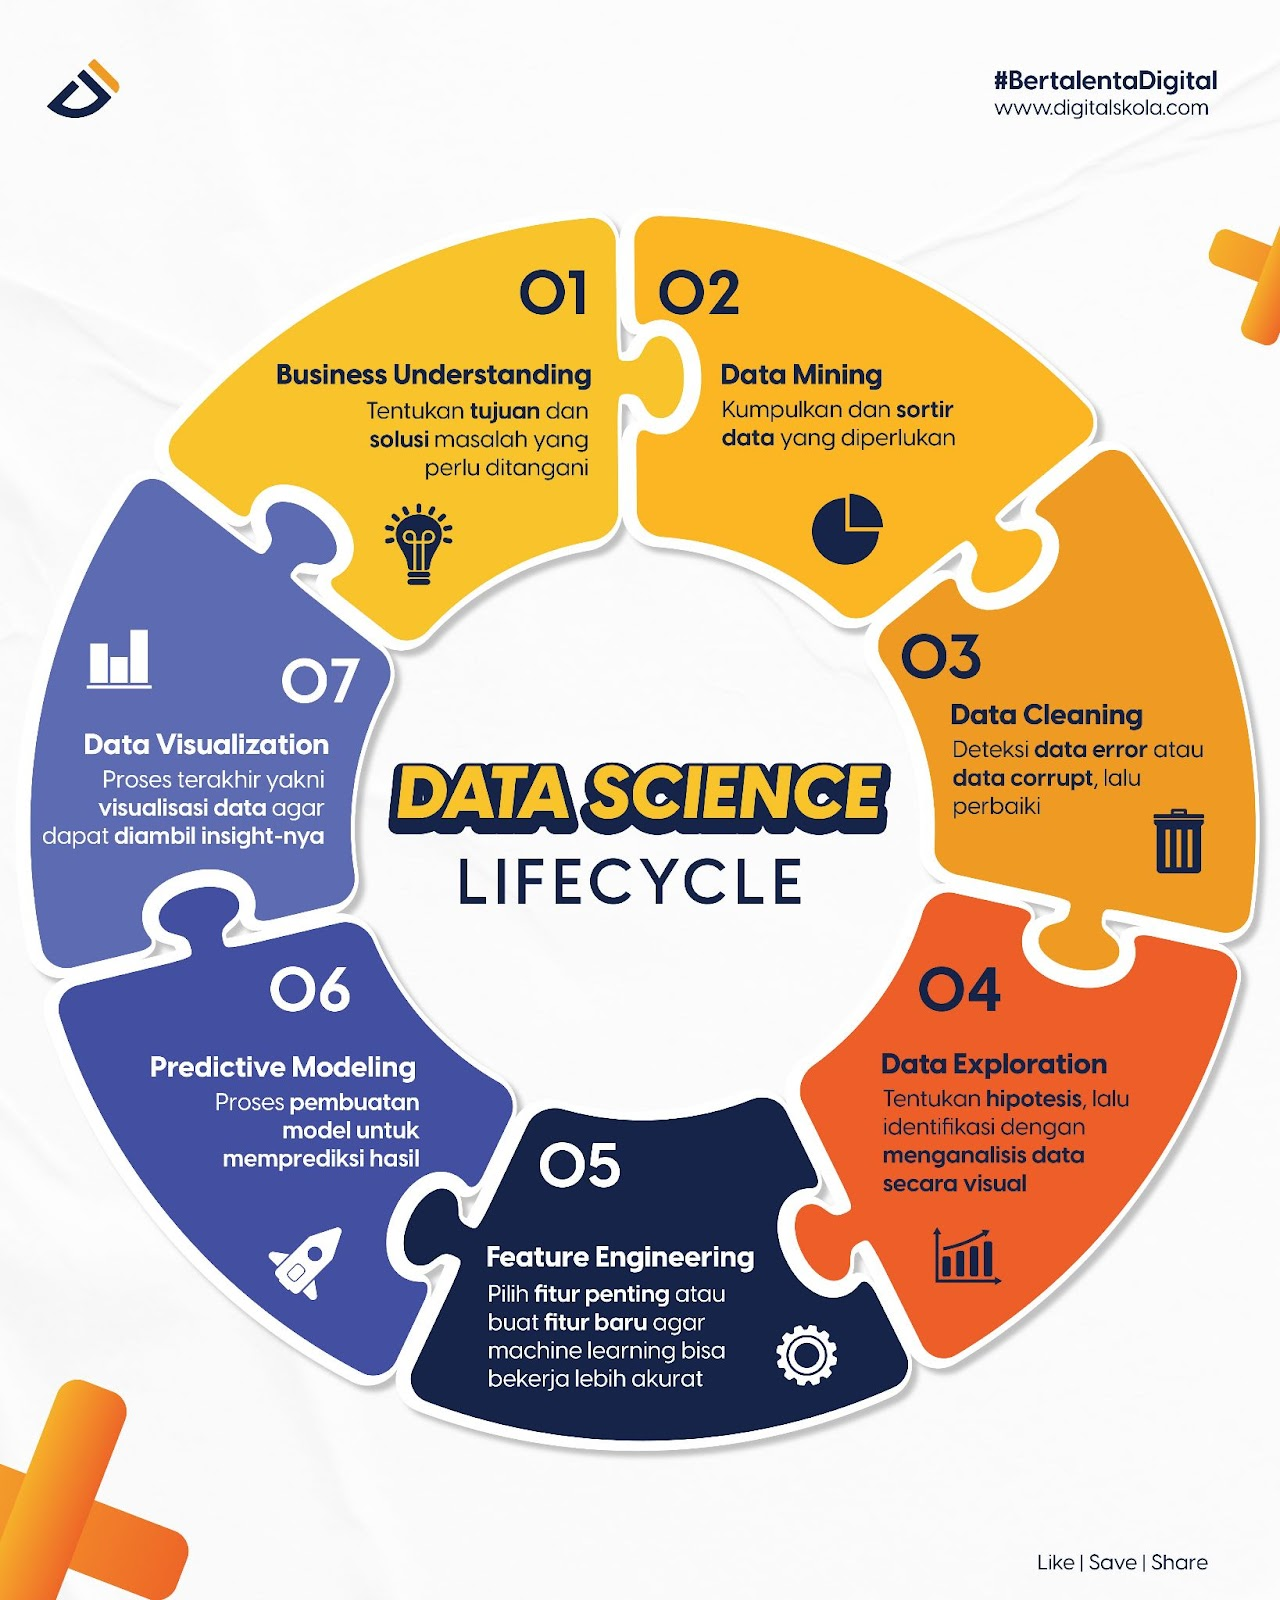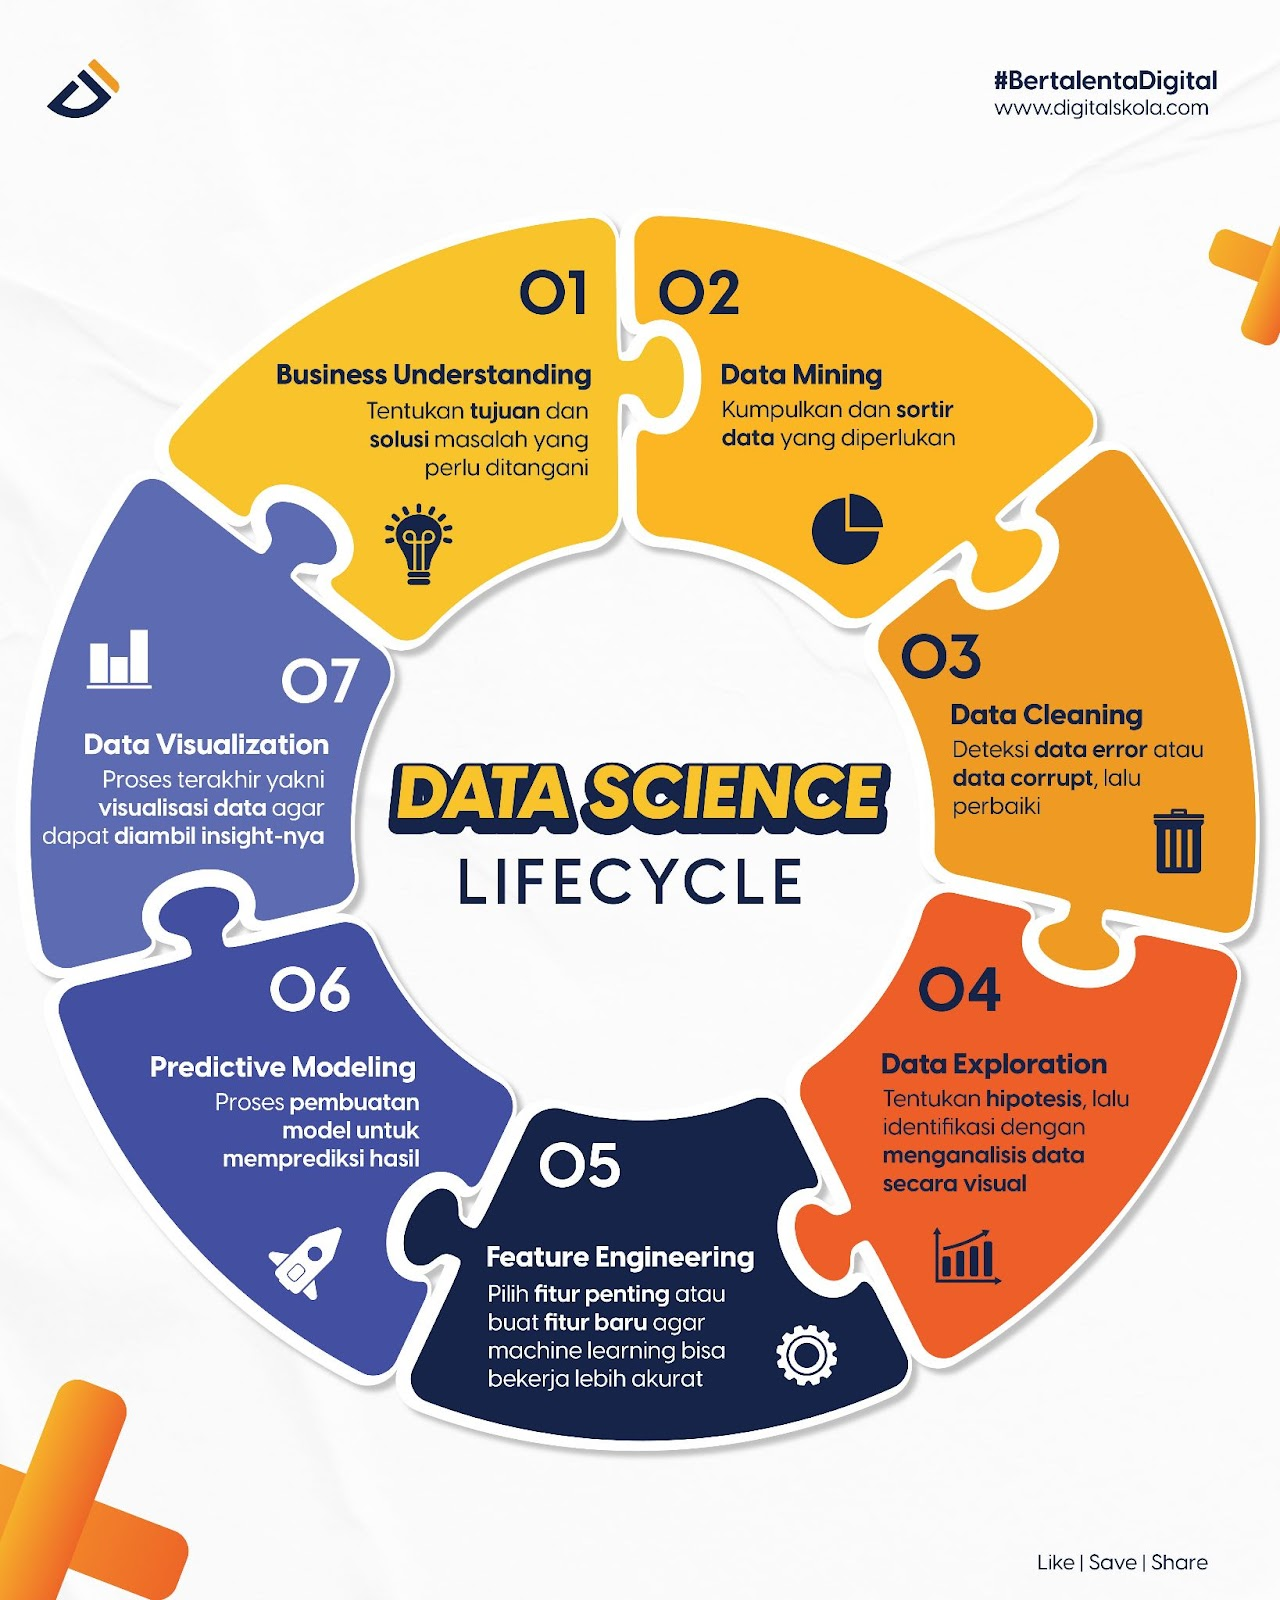)

a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?


Terjemah

a) Apakah harga bervariasi dengan maskapai penerbangan?

b) Bagaimana harga tiket terpengaruh ketika tiket dibeli hanya 1 atau 2 hari sebelum keberangkatan?

c) Apakah harga tiket berubah berdasarkan waktu keberangkatan dan waktu kedatangan?

d) Bagaimana perubahan harga dengan perubahan asal dan tujuan?

e) Bagaimana harga tiket bervariasi antara kelas Ekonomi dan Bisnis?

#Load and Explore the Dataset

In [1]:
import pandas as pd

In [2]:
Path = '/content/drive/MyDrive/latihan/latihan/flight price prediction/sample_data.csv'
df = pd.read_csv(Path)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head(10))

First few rows of the dataset:
     airline   flight source_city departure_time        stops arrival_time  \
0    Vistara   UK-653      Mumbai  Early_Morning  two_or_more      Morning   
1     Indigo  6E-2174   Bangalore        Evening         zero        Night   
2  Air_India  AI-9657      Mumbai        Evening          one    Afternoon   
3   GO_FIRST   G8-334       Delhi  Early_Morning          one      Evening   
4    Vistara   UK-928      Mumbai  Early_Morning          one        Night   
5  Air_India   AI-774      Mumbai          Night          one      Evening   
6  Air_India   AI-839       Delhi          Night          one        Night   
7    Vistara   UK-996      Mumbai        Evening          one      Morning   
8    AirAsia   I5-749   Bangalore          Night         zero   Late_Night   
9    Vistara   UK-863      Mumbai        Morning          one        Night   

  destination_city    class  duration  days_left    price  
0        Bangalore  Economy     26.67       26.0  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           1294 non-null   object 
 1   flight            1294 non-null   object 
 2   source_city       1294 non-null   object 
 3   departure_time    1294 non-null   object 
 4   stops             1294 non-null   object 
 5   arrival_time      1294 non-null   object 
 6   destination_city  1294 non-null   object 
 7   class             1294 non-null   object 
 8   duration          1294 non-null   float64
 9   days_left         1294 non-null   float64
 10  price             1294 non-null   float64
dtypes: float64(3), object(8)
memory usage: 111.3+ KB
None


###Drop Colums

In [5]:
# df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

airline   flight source_city departure_time        stops arrival_time  \
0    Vistara   UK-653      Mumbai  Early_Morning  two_or_more      Morning   
1     Indigo  6E-2174   Bangalore        Evening         zero        Night   
2  Air_India  AI-9657      Mumbai        Evening          one    Afternoon   
3   GO_FIRST   G8-334       Delhi  Early_Morning          one      Evening   
4    Vistara   UK-928      Mumbai  Early_Morning          one        Night   

  destination_city    class  duration  days_left    price  
0        Bangalore  Economy     26.67       26.0  10756.0  
1            Delhi  Economy      2.92       41.0   4500.0  
2        Hyderabad  Economy     19.67        9.0   8148.0  
3        Bangalore  Economy      8.17       29.0   4020.0  
4        Bangalore  Economy     13.92       38.0   6765.0

### menampilkan data missing value

In [7]:
print(df.isnull().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


### menamplkan data null

In [8]:
print(df.loc[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []


###drop data null

In [9]:
df = df.dropna()

In [10]:
print(df.isnull().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [11]:
print(df.shape)

(1294, 11)


#Data Preprocessing

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Verify the column names
print("Columns in the dataset:", df.columns)

# Define the categorical features to be encoded with lowercase column names
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Ensure 'price' column exists in the dataset
if 'price' in df.columns:
    # Use ColumnTransformer to apply OneHotEncoder to the categorical features
    column_transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_features)
        ], remainder='passthrough'
    )

    # Apply the transformations to the dataset
    X = df.drop('price', axis=1)
    y = df['price']
    X = column_transformer.fit_transform(X)

    # Standardize the data
    scaler = StandardScaler(with_mean=False)
    X = scaler.fit_transform(X)

    print("Transformation and scaling successful!")
else:
    print("Error: 'price' column not found in the dataset.")


Columns in the dataset: Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')
Transformation and scaling successful!


#Exploratory Data Analysis (EDA)

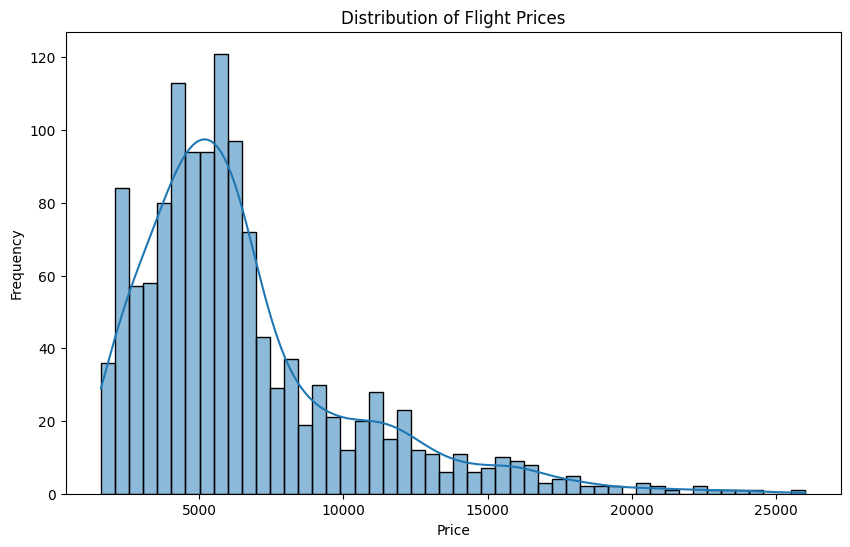

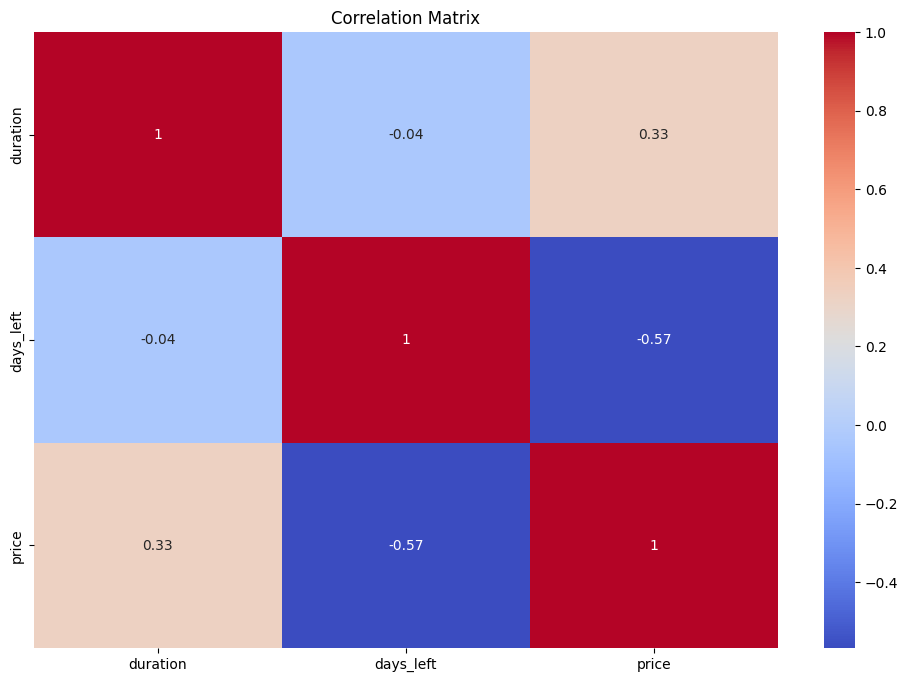

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Select only numerical columns for correlation matrix
numerical_features = ['duration', 'days_left', 'price']

# Create a subset of the dataset with only numerical columns
numerical_data = df[numerical_features]

# Visualize correlations between numerical features and price
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Model Building, Insights and Interpretation

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


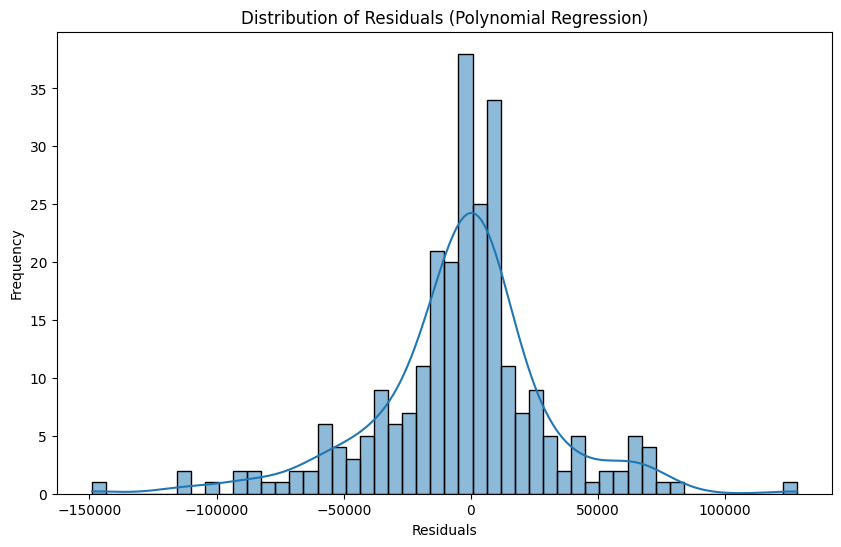

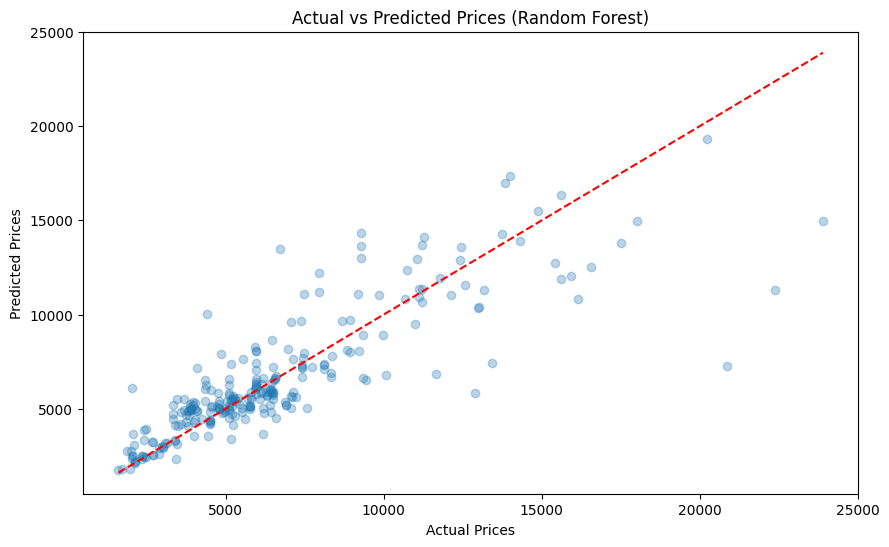


Model Performance Metrics:

Linear Regression Metrics:
Mean Absolute Error: 2626.0749799237797
Mean Squared Error: 11837474.745482234
R-squared: 0.1898816317214973

Artificial Neural Network Metrics:
Mean Absolute Error: 5122.744329533787
Mean Squared Error: 40919331.515452005
R-squared: -1.8003862978458796

Polynomial Regression Metrics:
Mean Absolute Error: 23171.762115440015
Mean Squared Error: 1178796893.664752
R-squared: -79.67303513292971

Random Forest Regression Metrics:
Mean Absolute Error: 1238.8690347490349
Mean Squared Error: 4261692.013865638
R-squared: 0.7083436244122936

K-Nearest Neighbors Regression Metrics:
Mean Absolute Error: 2817.8401544401545
Mean Squared Error: 12949612.951505791
R-squared: 0.11377050091567764


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define categorical features
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Use ColumnTransformer to apply OneHotEncoder to the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough'
)

# Apply the transformations to the dataset
X = df.drop('price', axis=1)
y = df['price']
X = column_transformer.fit_transform(X)

# Standardize the data
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_linear_pred)
mse = mean_squared_error(y_test, y_linear_pred)
r2 = r2_score(y_test, y_linear_pred)

# ANN Regression
ann_model = MLPRegressor(random_state=42, max_iter=100)
ann_model.fit(X_train, y_train)
y_ann_pred = ann_model.predict(X_test)
ann_mae = mean_absolute_error(y_test, y_ann_pred)
ann_mse = mean_squared_error(y_test, y_ann_pred)
ann_r2 = r2_score(y_test, y_ann_pred)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)


# Visualisasi residuals (selisih antara nilai aktual dan prediksi) untuk model Polynomial Regression
residuals = y_test - y_poly_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals (Polynomial Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Feature Importance untuk model Random Forest
importances = rf_model.feature_importances_
feature_names = column_transformer.get_feature_names_out()
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


# Visualisasi perbandingan antara nilai prediksi dan nilai aktual untuk model terbaik (random forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Menampilkan metrik performa model
print("\nModel Performance Metrics:")

# Linear Regression Metrics
print("\nLinear Regression Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Artificial Neural Network Metrics
print("\nArtificial Neural Network Metrics:")
print(f"Mean Absolute Error: {ann_mae}")
print(f"Mean Squared Error: {ann_mse}")
print(f"R-squared: {ann_r2}")

# Polynomial Regression Metrics
print("\nPolynomial Regression Metrics:")
print(f"Mean Absolute Error: {poly_mae}")
print(f"Mean Squared Error: {poly_mse}")
print(f"R-squared: {poly_r2}")

# Random Forest Metrics
print("\nRandom Forest Regression Metrics:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

# K-Nearest Neighbors Metrics
print("\nK-Nearest Neighbors Regression Metrics:")
print(f"Mean Absolute Error: {knn_mae}")
print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared: {knn_r2}")
